<a href="https://colab.research.google.com/github/muid-uddin-chowdhury/ETE_456/blob/main/Lab_04_Regresion_1608030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**ETE-456: Regression Project on Medical Cost Personal Dataset**

    Objective:

        Apply various regression algorithms on the real world dataset.



**Dataset (Medical Cost Personal Datasets)**

Columns

**age:** age of primary beneficiary

**sex:** insurance contractor gender, female, male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker:** Smoking

**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Importing Libraries

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

Downloading the files


In [ ]:
!wget -O insurance.csv https://www.dropbox.com/s/mwgqgjbmfw0xa5p/insurance.csv?dl=0

--2021-12-20 16:07:46--  https://www.dropbox.com/s/mwgqgjbmfw0xa5p/insurance.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/mwgqgjbmfw0xa5p/insurance.csv [following]
--2021-12-20 16:07:46--  https://www.dropbox.com/s/raw/mwgqgjbmfw0xa5p/insurance.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb6f1b8ed91b31de0fdbc68d315.dl.dropboxusercontent.com/cd/0/inline/BcOZDT2tly7lcqw-laSoJHvlJpY1HDTfa3rL1y-gM89Bl4pG2x8113w2m7VDo2hVVn5aCT6gHSi80o8cUYM_XFmKkX-3sk7FR1w929swg1SbA3brs113qGjzbfLNr4D-q64GPmXN5ENpFMHBT-pm-LRS/file# [following]
--2021-12-20 16:07:46--  https://ucb6f1b8ed91b31de0fdbc68d315.dl.dropboxusercontent.com/cd/0/inline/BcOZDT2tly7lcqw-laSoJHvlJpY1HDTfa3rL1y-gM89Bl4pG2x8113w2m7VDo2hVVn5aCT6gHSi80o8cUY

Reading the Dataset

In [ ]:
d_set = pd.read_csv('insurance.csv')
d_set

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Separating Features and Targets

In [ ]:
features = d_set[['age', 'sex', 'bmi', 'children','smoker','region']]

target = d_set[['charges']]

In [ ]:
features


,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [ ]:
target

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder_f = LabelEncoder()

features['sex'] = labelencoder_f.fit_transform(features['sex'])
features['smoker'] = labelencoder_f.fit_transform(features['smoker'])
features['region'] = labelencoder_f.fit_transform(features['region'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
features

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


Missing Values Implementations

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean")
imputer = imputer.fit(features[['age', 'sex', 'bmi', 'children','smoker','region']])

In [ ]:
features[['age', 'sex', 'bmi', 'children','smoker','region']]= imputer.transform(features[['age', 'sex', 'bmi', 'children','smoker','region']]

SyntaxError: ignored

In [ ]:
features

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") # imputer is an object of Imputer class 
imputer = imputer.fit(target[['charges']])

In [ ]:
target[['charges']]= imputer.transform(target[['charges']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
target

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size = 0.2,random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1070, 6)
(268, 6)


In [ ]:
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
y_sc = StandardScaler()
y_train = y_sc.fit_transform(y_train[['charges']])
y_test = y_sc.transform(y_test[['charges']])

Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()


regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
regressor.score(X_train,y_train)

0.7368306228430945

In [ ]:
y_test

array([[-2.90360755e-01],
       [-3.88647200e-01],
       [ 2.71438394e+00],
       [-2.09721124e-02],
       [-2.97065319e-01],
       [-7.26671304e-01],
       [-9.18940714e-01],
       [-1.47361673e-01],
       [-4.73043767e-01],
       [-6.49444142e-01],
       [-5.38531882e-01],
       [-2.26101189e-01],
       [-4.89698454e-01],
       [-7.52999425e-01],
       [ 4.26736889e-01],
       [-2.08671402e-01],
       [-5.65894545e-02],
       [-8.11006298e-01],
       [-5.63185752e-01],
       [ 1.69328373e+00],
       [ 8.99164540e-01],
       [-4.65863314e-02],
       [ 8.22176839e-01],
       [ 8.23835038e-01],
       [-9.62666851e-01],
       [-7.12701491e-01],
       [-7.90788753e-01],
       [-4.60891484e-01],
       [-7.88784629e-01],
       [-3.99857588e-01],
       [-4.29404684e-01],
       [ 2.98733744e+00],
       [-1.85261566e-02],
       [ 6.20458841e-01],
       [ 1.14477957e-01],
       [-7.56972780e-01],
       [-4.05394683e-01],
       [ 3.17310604e+00],
       [ 2.2

In [ ]:
X_test

,age,sex,bmi,children,smoker,region
578,52,1,30.200,1,0,3
610,47,0,29.370,1,0,2
569,48,1,40.565,2,1,1
1034,61,1,38.380,0,0,1
198,51,0,18.050,0,0,1
...,...,...,...,...,...,...
1084,62,0,30.495,2,0,1
726,41,1,28.405,1,0,1
1132,57,1,40.280,0,0,0
725,30,0,39.050,3,1,2


In [ ]:
y_pred

array([[-1.82397841e-01],
       [-2.85099148e-01],
       [ 2.07069569e+00],
       [ 2.44003975e-01],
       [-5.23689076e-01],
       [-7.71045640e-01],
       [-9.72926790e-01],
       [ 9.03680276e-02],
       [-3.54761076e-01],
       [-4.81831323e-01],
       [-7.22976711e-01],
       [-2.46702450e-01],
       [-3.79509044e-01],
       [-7.57918614e-01],
       [ 1.22019971e+00],
       [-1.80529836e-01],
       [-1.62836802e-01],
       [-5.98833743e-01],
       [-4.19907641e-01],
       [ 1.15573478e+00],
       [ 1.70180511e+00],
       [ 8.90214986e-02],
       [-1.26625563e-01],
       [ 1.60401397e+00],
       [-7.33827716e-01],
       [-3.38672047e-01],
       [-1.00833105e+00],
       [-2.59908886e-01],
       [-7.61123005e-01],
       [-2.37545828e-01],
       [-3.54025144e-01],
       [ 2.25865181e+00],
       [ 1.90146991e-01],
       [ 3.89151803e-02],
       [ 9.63818549e-01],
       [-6.74078969e-01],
       [-2.99239284e-02],
       [ 1.44695638e+00],
       [ 1.6

Mean Absoulte Error

In [ ]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(y_test, y_pred)

0.328251006254937

Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.22213004284614

R-Squared Error

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7998747145449959

In [ ]:
regressor.score(X_train,y_train)

0.7368306228430945

Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR 

regressor = SVR(kernel = 'linear')
regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
regressor.score(X_train,y_train)

0.6795638290744734

In [ ]:
r2_score(y_test, y_pred)

0.7689076024715965

In [ ]:
mean_absolute_error(y_test, y_pred)

0.26206449818981736

In [ ]:
mean_squared_error(y_test, y_pred)

0.25650214088485607

In [ ]:
from sklearn.tree import DecisionTreeRegressor


regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.6562575965127319

In [ ]:
regressor.score(X_train,y_train)

0.9982963931606104

In [ ]:
mean_squared_error(y_test, y_pred)

0.3815385679079004

In [ ]:
mean_absolute_error(y_test, y_pred)

0.3008404697042962

Random Forrest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10,random_state = 0) # n estiamator is the number of decision trees
regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.8757214770662562

In [ ]:
regressor.score(X_train,y_train)

0.9644959129365694

In [ ]:
mean_absolute_error(y_test, y_pred)

0.2156241682333011

In [ ]:
mean_squared_error(y_test, y_pred)

0.1379435565144235

**Result Analysis**

Result analysis of used regression alagrotihm used in this projects in the table below. 
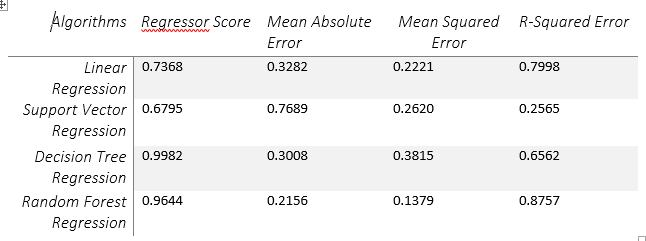

# ***Disscussion***

Here, We used 4 different algorithms named Linear Regression, Support Vector Regresio, Decision Tree Regression and Random Forest Regression. 4 different errors are found for 4 different algorithms. For this, proper scaling of features and target was important. And splitting of test set and trainging set was also important to do this work in less time and complexcity. It can be said from the table is, Random Forest Regression's Regessor score can give best result for this project.